# Statistics Assignment-3 
# (Hypothesis Tests)

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

## Exercise-1

__- The hourly wages in a particular industry are normally distributed with mean 13.20 USD and standard deviation 2.50 USD__<br>
__- A company in this industry employs 40 workers, paying them an average of 12.20 USD per hour.__<br><br> 
__- Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)__<br><br>

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826



sigma_p = 2.5 
xbar_p = 13.2 
xbar_s = 12.2
n = 40
alpha = 0.01

  
 
__- We know the population std, so we'll use "z" statistic test.__

### 1. Assumptions

__- Check the normality__<br><br>

__* The hourly wages are normally distributed__

### 2. Null and Alternative Hypothesis

__H0: µ = 13.2 ("the population mean is equal to 13.2 ")__

__H1: µ < 13.2 ("the population mean is less than 13.2")__

### 3. Test Statistics

__- We know the population std, so we'll use "z" statistic test.__

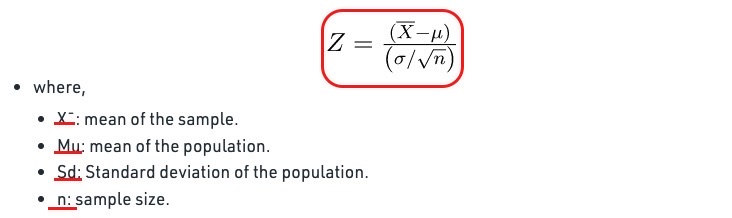

In [4]:
wageTest_z = (12.2 - 13.2) / (2.5 / np.sqrt(40))
wageTest_z

-2.5298221281347035

### 4. P-value

In [8]:
# z score is 2.53 --> find p value from the z-table
p_value = 0.005706018193000826

### 2nd option to find P value

In [6]:
pValue = stats.norm.cdf(wageTest_z)
pValue

0.005706018193000826

### 5. Conclusion

__since p_value < alpha (0.0057 < 0.01), null hypothesis will be rejected__

In [9]:
alpha = 0.01

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

Reject the null hypothesis


__- So, it can be inferred from this analysis that this company may be paying substandart wages to its employees.__

## Exercise-2

__- Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot).__<br><br> 
__- Do the soils appear to differ with respect to average shear strength, at the 1% significance level?__<br><br>

Results for two type of soils<br><br>

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [4]:
# Let's import the data
df = pd.read_csv("soil - Sheet1.csv")
df.head()


,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [11]:
df["Soil1"].mean()

1.6918

In [13]:
df["Soil2"].mean()

1.4171142857142855

In [12]:
soil1_var = df["Soil1"].std() ** 2 
soil1_var

0.04280878620689653

In [14]:
soil2_var = df["Soil2"].std() ** 2 
soil2_var

# We can assume the variances are equal

0.048041751260504195

### 2. Null and Alternative Hypothesis

__H0: µSoil1 = µSoil2 ("the two soils mean are equal")__<br><br>

__H1: µSoil1 ≠ µSoil2 ("the two soils mean are not equal")__

### 3. Test Statistics

__- We don't know the population std, so we'll use "t" statistic test.__

In [15]:
soilTest = stats.ttest_ind(df["Soil1"].dropna(), df["Soil2"].dropna(), equal_var=True, alternative="two-sided")
soilTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

### 4. P-value

In [17]:
p_value=2.593228732352821e-06

### 5. Conclusion

__since p_value < alpha, null hypothesis will be rejected__

In [18]:
alpha = 0.01

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

Reject the null hypothesis


__the soils appear to differ with respect to average shear strength, at the 1% significance level__

## Exercise-3

__The following dataset is based on data provided by the World Bank__<br><br>  (https://datacatalog.worldbank.org/dataset/education-statistics).<br>  
World Bank Edstats.  2015 PISA Test Dataset

__1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).__<br>
__2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.__<br><br>
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [17]:
df = pd.read_excel("2015 PISA Test.xlsx")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [25]:
df_EU = df[df["Continent_Code"] == "EU"]["Math"]
df_EU

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [26]:
df_AS = df[df["Continent_Code"] == "AS"]["Math"]
df_AS

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

### 1. Assumptions

__assume normality and equal variances__

### 2. Null and Alternative Hypothesis

__H0: µEU = µAS ("the two continents math score mean are equal")__<br><br>

__H1: µEU ≠ µAS ("the two continents math score soils mean are not equal")__

### 3. Test Statistics

In [27]:
# The population std is unknown, so we'll use t score

m_scoreTest = stats.ttest_ind(df_EU, df_AS, equal_var=True, alternative="two-sided")
m_scoreTest

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

### 4. P-value

In [28]:
p_value = 0.38826888111307556

### 5. Conclusion

__since p_value < alpha, null hypothesis will be rejected__

In [29]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

fail to reject the null hypothesis


__There may not be any difference (on the average) for the math scores among European (EU) and Asian (AS) countries__

__3. Draw side by side box-plots__

## Exercise-4

__- A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight.__<br> 
__- To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer.__<br><br>  
__- Did the exercise and diet program have an impact on customers' weight loss?__<br>  
__- Use an α = .01 level test.__<br><br> 

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

### 2. Null and Alternative Hypothesis

__H0: µstart = µend ("the customers' weight loss before and after the program are equal")__<br><br>

__H1: µend < µstart ("the customers' weight measurements after the program less than  measurements before the program ")__

### 3. Test Statistics

In [33]:
df = pd.read_csv("weight - Sheet1.csv")
df

,ID,starting,ending
0,1,76,72
1,2,81,82
2,3,86,84
3,4,71,71
4,5,88,83
5,6,78,74
6,7,76,70
7,8,81,80
8,9,79,78
9,10,77,79


In [40]:
# The population std is unknown, so we'll use t score

weightTest = stats.ttest_rel(df["starting"], df["ending"], alternative="greater")
weightTest 

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)

### 4. P-value

In [38]:
p_value=0.00900646517506626

### 5. Conclusion

__since p_value < alpha, null hypothesis will be rejected__

In [39]:
alpha = 0.01

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("fail to reject the null hypothesis")

Reject the null hypothesis


 __The exercise and diet program have a positive impact on customers' weight loss__